# 데이터셋 출처
* https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 데이터 구성
* Pregnancies : 임신횟수
* Glucose : 2시간 동안의경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린(mu U / ml)
* BMI : 체질량 지수(체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드한다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터셋 로드

In [5]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 학습, 예측 데이터셋 나누기

In [8]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담는다.

split_count = int(df.shape[0] * 0.8)
split_count

614

In [11]:
# train, test로 슬라이싱을 통해 데이터를 나눈다.

train = df[:split_count].copy()
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0
610,3,106,54,21,158,30.9,0.292,24,0
611,3,174,58,22,194,32.9,0.593,36,1
612,7,168,88,42,321,38.2,0.787,40,1


In [12]:
test = df[split_count:].copy()
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
614,11,138,74,26,144,36.1,0.557,50,1
615,3,106,72,0,0,25.8,0.207,27,0
616,6,117,96,0,0,28.7,0.157,30,0
617,2,68,62,13,15,20.1,0.257,23,0
618,9,112,82,24,0,28.2,1.282,50,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 학습, 예측에 사용할 컬럼

In [17]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져온다.

feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 정답값이자 예측해야 될 값

In [21]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담는다.

label_name = train.columns[-1]
label_name

'Outcome'

# 학습, 예측 데이터셋 만들기

In [24]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [27]:
# 정답값을 만들어 준다. 예) 기출문제의 정답

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [29]:
# 예측에 사용할 데이터세트를 만든다. 예) 실전 시험 문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [30]:
# 예측의 정답값 예) 실전 시험 문제의 정답

y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

# 학습(훈련)
* 시험을 볼 때 기출문제(X_train) 와 정답(y_train)을 보고 공부하는 과정과 유사하다.

In [33]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# 예측
* 실전 시험문제(X_train) 라고 보면 된다. 우리가 정답을 직접 예측한다.

In [36]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

# 트리 알고리즘 분석하기
* 의사결정나무를 시각화 한다.

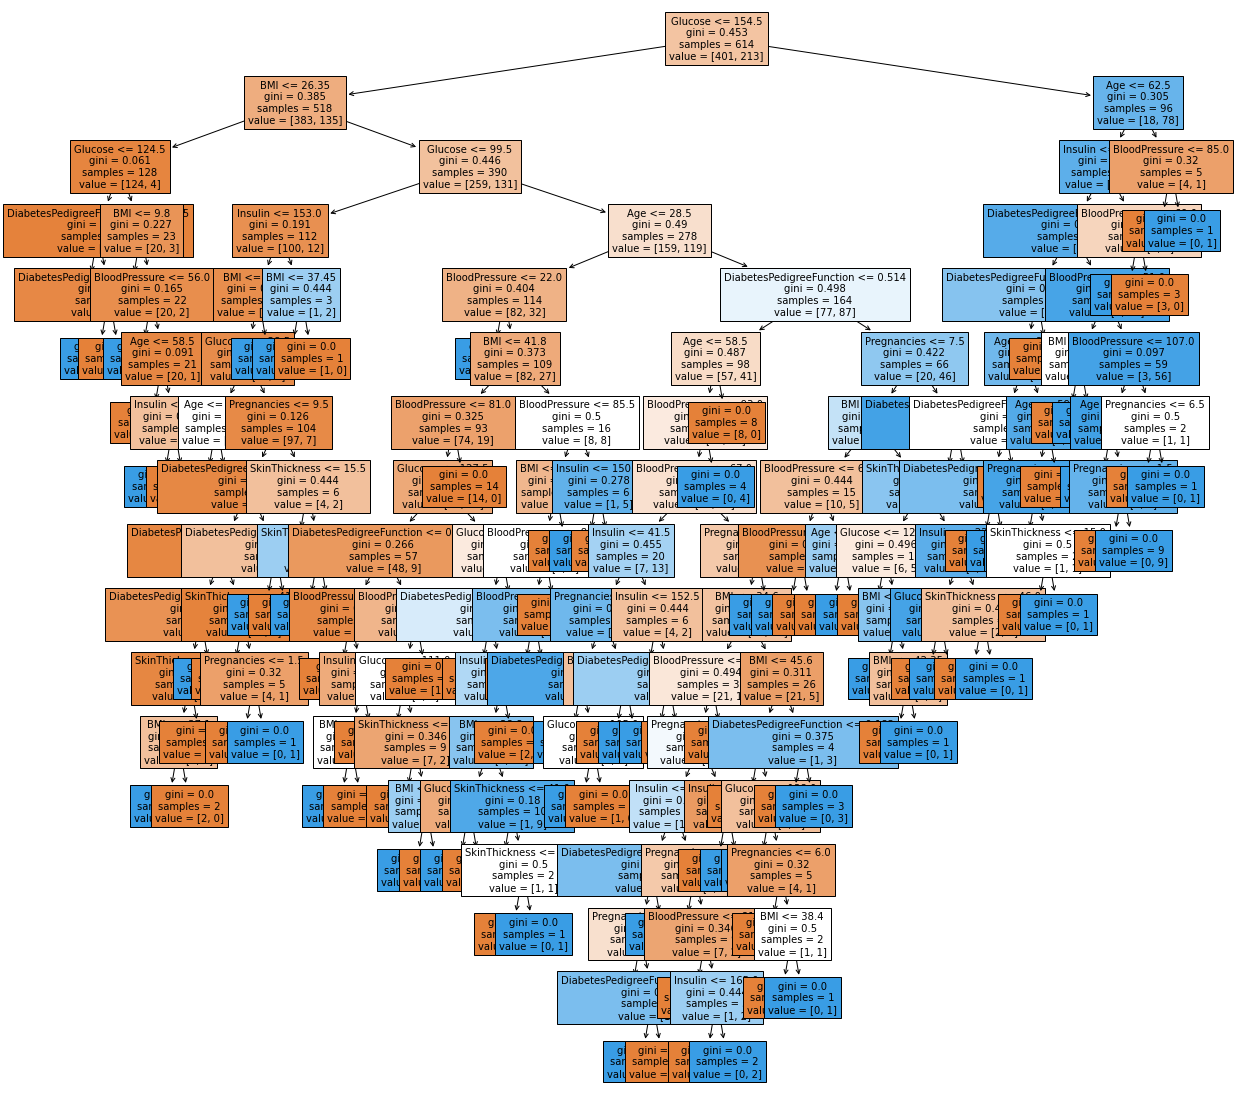

In [42]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, 
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

In [37]:
# graphviz 를 통해 시각화 한다.
# graphviz 는 별도의 설치가 필요하다.
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주어야 한다.
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model,
#                            feature_names = feature_names,
#                            filled=True)
# graphviz.Source(dot_tree)

In [43]:
# 피처의 중요도 추출

model.feature_importances_

array([0.07492728, 0.30728389, 0.13427121, 0.04222787, 0.07082533,
       0.16464007, 0.11893098, 0.08689337])

<AxesSubplot:>

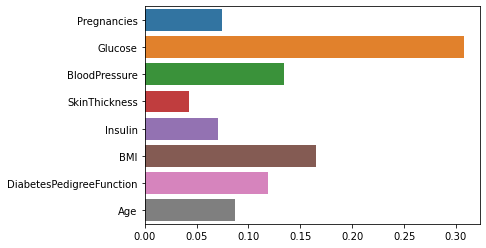

In [45]:
# 피처의 중요도 시각화하기

sns.barplot(x=model.feature_importances_, y=feature_names)

# 정확도(Accuracy) 측정하기

In [51]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 된다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.

diff_count = abs(y_test - y_predict).sum()
diff_count

41

In [55]:
# 예측의 정확도를 구한다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 된다.

(len(y_test) - diff_count) / len(y_test) * 100

73.37662337662337

In [57]:
# 위에서처럼 직접 구할수도 있지만, 미리 구현된 알고리즘을 가져와 사용한다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

73.37662337662337

In [60]:
# model 의 score 로 점수를 계산한다.(정답값을 알고 있는 경우에)

model.score(X_test, y_test) * 100

73.37662337662337